# `Модель кластеризации`

### Этап 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
iris = load_iris()  # загрузили датасет
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Этап 2. Предаварительная обработка данных

In [3]:
df.isnull().sum()  # количество нечисловых значений

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [4]:
iris_scaled = StandardScaler().fit_transform(df)  # скорректировали значения в признаках
df = pd.DataFrame(iris_scaled, columns=iris.feature_names)
df.round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32
3,-1.51,0.10,-1.28,-1.32
4,-1.02,1.25,-1.34,-1.32
...,...,...,...,...
145,1.04,-0.13,0.82,1.45
146,0.55,-1.28,0.71,0.92
147,0.80,-0.13,0.82,1.05
148,0.43,0.79,0.93,1.45


### Этап 3. Обучение и оценка качества модели

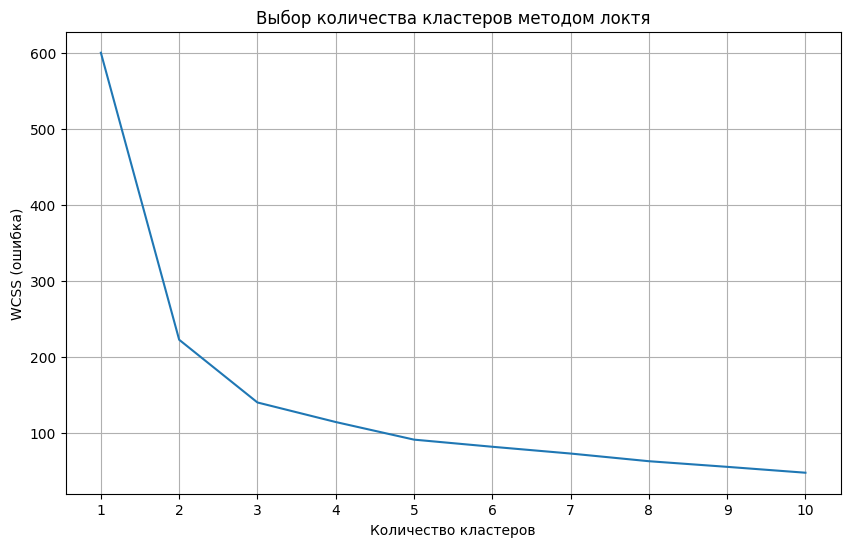

In [5]:
# подбор количества кластеров

x = df

wcss = []  # список, в котором будут храниться показатели ошибки при подборе количества кластеров

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    # init может принимать 2 аргумента: k_means++ или random. при random центроиды располагаются сначала случайно, при k-means++ на максимальном расстоянии друг от друга
    # max_iter определяет, сколько итераций корректирования центроидов внутри одной попытки подбора центроидов
    # n_iter определяет, сколько попыток корректирования центроидов будет
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список

# построение графика изменения ошибки от количества кластеров
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(range(1, 11), wcss)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS (ошибка)')
plt.xticks(range(1, 11));  # единичный отрезок

# делаем вывод, что скорее всего должно быть 3 кластера, тк при 3 кластерах ошибка перестает сильно уменьшаться

Обучение модели с тремя кластерами (k = 3)

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(x)
y_pred
# оценим качество разделения модели. то, что предсказала модель

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
iris.target
# то, что есть на самом деле

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# кодировка видов не совпадает, следовательно надо поменять местами 1 и 0
for i, el in enumerate(y_pred):
    if el == 1: y_pred[i] = 0
    elif el == 0: y_pred[i] = 1
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [9]:
# таблица реального разделения и предсказанного
d = {'Target' : iris.target, 'Prediction' : y_pred}
res = pd.DataFrame(d)
comparison = np.where(res['Target'] == res['Prediction'], True, False)  # если значение в 1 столюце равно значению во 2, то вернется True, иначе False
res['Comparison'] = comparison
res

,Target,Prediction,Comparison
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
...,...,...,...
145,2,2,True
146,2,1,False
147,2,2,True
148,2,2,True


In [10]:
res['Comparison'].value_counts(normalize=True).round(2)  # доля совпавших и несовпавших результатов

Comparison
True     0.83
False    0.17
Name: proportion, dtype: float64

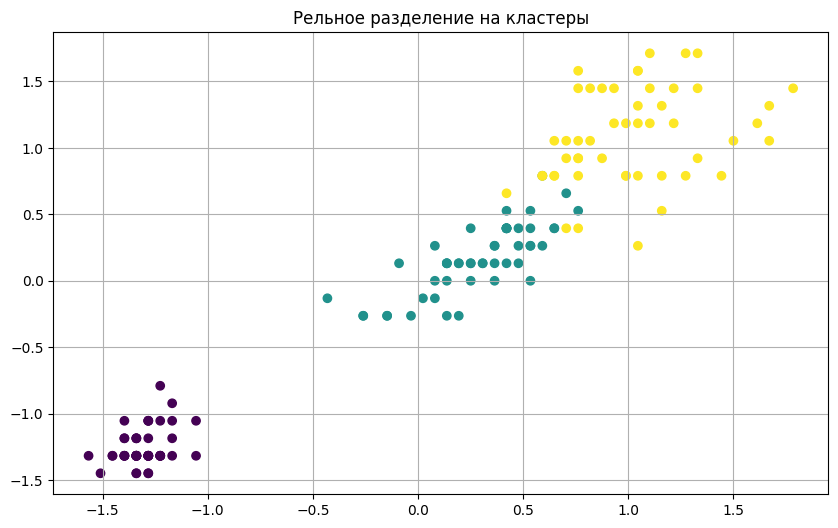

In [11]:
# график зависимости изначального разделения на классы от 3 и 4 признака
# реальное, верное распределение
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.title('Рельное разделение на кластеры')
plt.scatter(x.iloc[:, 2], x.iloc[:, 3], c=iris.target);

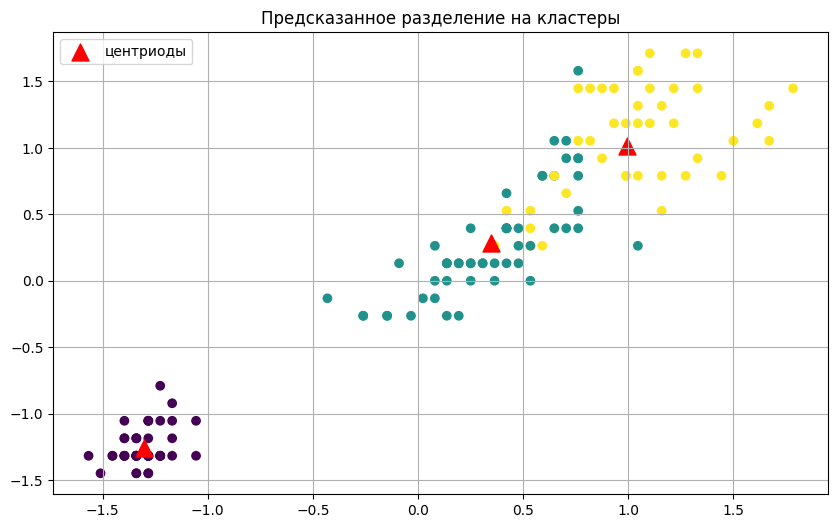

In [12]:
# график зависимости разделения на кластеры моделью от 3 и 4 признака
# результат работы алгоритма кластеризации
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.scatter(x.iloc[:, 2], x.iloc[:, 3], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 150, c = 'red', marker = '^', label = 'центриоды')
plt.title('Предсказанное разделение на кластеры')
# s - размер центриод
# marker - форма центриод
plt.legend(loc='upper left');